In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
auto_data = pd.read_csv('../datasets/auto-mpg.csv')
auto_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
auto_data.shape

(398, 9)

In [5]:
auto_data = auto_data.replace('?', np.nan)
auto_data = auto_data.dropna()

In [6]:
auto_data.shape

(392, 9)

In [7]:
auto_data.drop(['origin', 'car name'], axis=1, inplace=True)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [8]:
auto_data['model year'] = '19' + auto_data['model year'].astype(str)
auto_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
35,17.0,6,250.0,100,3329,15.5,1971
319,31.3,4,120.0,75,2542,17.5,1980
143,26.0,4,97.0,78,2300,14.5,1974
2,18.0,8,318.0,150,3436,11.0,1970
10,15.0,8,383.0,170,3563,10.0,1970


In [9]:
import datetime

auto_data['age'] = datetime.datetime.now().year - pd.to_numeric(auto_data['model year'])

In [10]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
0,18.0,8,307.0,130,3504,12.0,1970,50
1,15.0,8,350.0,165,3693,11.5,1970,50
2,18.0,8,318.0,150,3436,11.0,1970,50
3,16.0,8,304.0,150,3433,12.0,1970,50
4,17.0,8,302.0,140,3449,10.5,1970,50


In [11]:
auto_data.drop(['model year'], axis=1, inplace=True)
auto_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
100,18.0,6,250.0,88,3021,16.5,47
239,30.0,4,97.0,67,1985,16.4,43
278,31.5,4,89.0,71,1990,14.9,42
392,27.0,4,151.0,90,2950,17.3,38
104,12.0,8,400.0,167,4906,12.5,47


In [12]:
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [13]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [14]:
auto_data.to_csv('../datasets/auto_data_pro.csv', index=False)

In [15]:
!ls datasets/

ls: datasets/: No such file or directory


In [16]:
!ls ../datasets/

500_Person_Gender_Height_Weight_Index.csv
HousingData.csv
Mall_Customers.json
Salary_Data.csv
auto-mpg.csv
auto_data_pro.csv
automobile_data_processed.csv
house_data_processed.csv
mall_data_column_oriented.json
mall_data_index_oriented.json
mall_data_pro.csv
mall_data_processed.csv
mall_data_records_oriented.json
mall_data_values_oriented.json
sp500_1987.csv
weight-height.csv


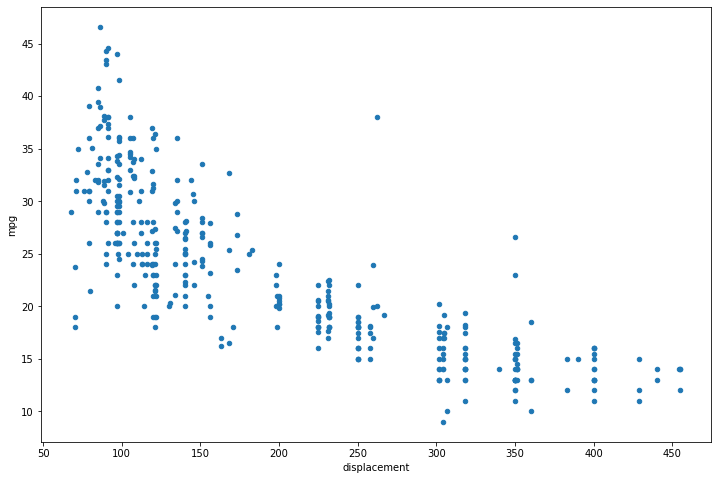

In [17]:
auto_data.plot.scatter(x='displacement', y='mpg', figsize=(12,8))
plt.show()

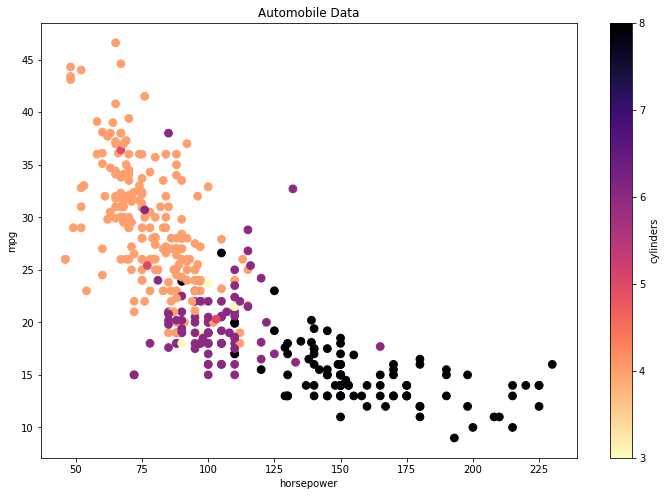

In [18]:
fig, ax = plt.subplots()
auto_data.plot(x='horsepower', y='mpg',
               kind='scatter', s=60, c='cylinders',
               cmap='magma_r', title='Automobile Data',
               figsize=(12,8), ax=ax)
plt.show()

In [19]:
auto_data['acceleration'].cov(auto_data['mpg'])

9.115514379664914

In [20]:
auto_data['acceleration'].corr(auto_data['mpg'])

0.4233285369027875

In [21]:
auto_data['horsepower'].corr(auto_data['mpg'])

-0.7784267838977759

In [22]:
auto_data['horsepower'].cov(auto_data['displacement'])

3614.0337439323557

In [23]:
auto_data['horsepower'].corr(auto_data['displacement'])

0.8972570018434687

In [24]:
auto_data_cov = auto_data.cov()
auto_data_cov

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,60.918142,-10.352928,-657.585207,-233.857926,-5517.440704,9.115514,-16.691477
cylinders,-10.352928,2.909696,169.721949,55.348244,1300.424363,-2.375052,2.171930
displacement,-657.585207,169.721949,10950.367554,3614.033744,82929.100139,-156.994435,142.572133
horsepower,-233.857926,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,59.036432
weight,-5517.440704,1300.424363,82929.100139,28265.620231,721484.709008,-976.815253,967.228457
acceleration,9.115514,-2.375052,-156.994435,-73.186967,-976.815253,7.611331,-2.950462
age,-16.691477,2.171930,142.572133,59.036432,967.228457,-2.950462,13.569915


In [25]:
auto_data_corr = auto_data.corr()
auto_data_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


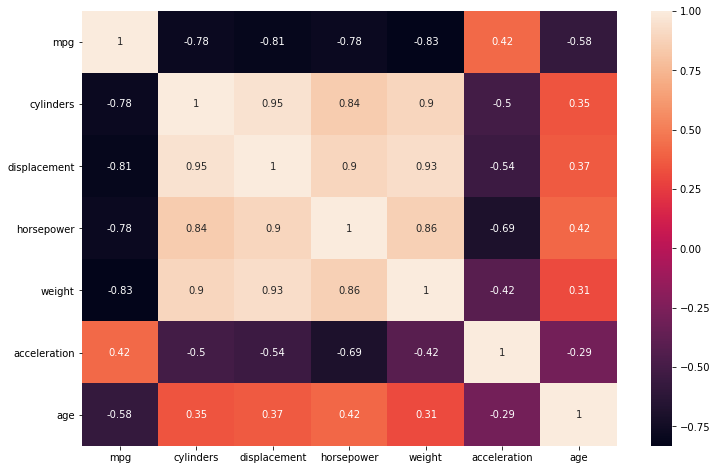

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(auto_data_corr, annot=True)